In [53]:
#%% Program 05d: The Lindstedt-Poincare Method
# Deriving the order epsilon equations.
# See Example 9.

#from sympy import collect, expand, Function, Symbol
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pprint


## Define the problem

In [54]:

x0 = sp.Function('x0')
x1 = sp.Function('x1')
x2 = sp.Function('x2')
x = sp.Function('x')
t = sp.Symbol('t')
eps = sp.Symbol('eps')
w1 = sp.Symbol('w1')
w2 = sp.Symbol('w2')

x = x0(t) + eps * x1(t) + eps ** 2 * x2(t)
exp1 = (1 + eps * w1 + eps ** 2 * w2) ** 2 * x.diff(t, t) + x - eps * x **3
exp1= sp.expand(exp1)
exp1


-eps**7*x2(t)**3 + eps**6*w2**2*Derivative(x2(t), (t, 2)) - 3*eps**6*x1(t)*x2(t)**2 + 2*eps**5*w1*w2*Derivative(x2(t), (t, 2)) + eps**5*w2**2*Derivative(x1(t), (t, 2)) - 3*eps**5*x0(t)*x2(t)**2 - 3*eps**5*x1(t)**2*x2(t) + eps**4*w1**2*Derivative(x2(t), (t, 2)) + 2*eps**4*w1*w2*Derivative(x1(t), (t, 2)) + eps**4*w2**2*Derivative(x0(t), (t, 2)) + 2*eps**4*w2*Derivative(x2(t), (t, 2)) - 6*eps**4*x0(t)*x1(t)*x2(t) - eps**4*x1(t)**3 + eps**3*w1**2*Derivative(x1(t), (t, 2)) + 2*eps**3*w1*w2*Derivative(x0(t), (t, 2)) + 2*eps**3*w1*Derivative(x2(t), (t, 2)) + 2*eps**3*w2*Derivative(x1(t), (t, 2)) - 3*eps**3*x0(t)**2*x2(t) - 3*eps**3*x0(t)*x1(t)**2 + eps**2*w1**2*Derivative(x0(t), (t, 2)) + 2*eps**2*w1*Derivative(x1(t), (t, 2)) + 2*eps**2*w2*Derivative(x0(t), (t, 2)) - 3*eps**2*x0(t)**2*x1(t) + eps**2*x2(t) + eps**2*Derivative(x2(t), (t, 2)) + 2*eps*w1*Derivative(x0(t), (t, 2)) - eps*x0(t)**3 + eps*x1(t) + eps*Derivative(x1(t), (t, 2)) + x0(t) + Derivative(x0(t), (t, 2))

## Zeroth order

In [55]:

#%% Zeroth order
eq0 = exp1.coeff(eps,0)
sp.pprint(eq0)
sol0=sp.solvers.ode.dsolve(eq0,ics={x0(0): 1, x0(t).diff(t).subs(t, 0): 0})
sp.pprint(sol0)



          2       
         d        
x₀(t) + ───(x₀(t))
          2       
        dt        
x₀(t) = cos(t)


## First order

In [56]:

# %% First order
eq1 = exp1.coeff(eps,1)
eq1


2*w1*Derivative(x0(t), (t, 2)) - x0(t)**3 + x1(t) + Derivative(x1(t), (t, 2))

In [57]:

prob1=eq1.subs(x0(t),sol0.rhs)
prob1=prob1.simplify().rewrite(sp.exp).expand()
prob1


-w1*exp(I*t) - w1*exp(-I*t) + x1(t) - exp(3*I*t)/8 - 3*exp(I*t)/8 + Derivative(x1(t), (t, 2)) - 3*exp(-I*t)/8 - exp(-3*I*t)/8

In [58]:

#%%
secular= prob1.simplify().rewrite(sp.exp).expand().coeff(sp.exp(sp.I*t))
secular

-w1 - 3/8

In [59]:

#sp.pprint(secular)
w1=sp.solve(secular,w1)

w1

[-3/8]

In [60]:

#sol1=sp.solvers.ode.dsolve(prob1,ics={x1(0): 1, x1(t).diff(t).subs(t, 0): 0})
# %%
prob1=prob1.subs('w1',w1[0])
prob1

x1(t) - exp(3*I*t)/8 + Derivative(x1(t), (t, 2)) - exp(-3*I*t)/8

In [61]:

#%%
sol1=sp.solvers.ode.dsolve(prob1,ics={x1(0):0,x1(t).diff(t).subs(t, 0): 0})
sol1
# %%

Eq(x1(t), -exp(3*I*t)/64 + cos(t)/32 - exp(-3*I*t)/64)

In [62]:
sol1=sol1.rewrite(sp.cos)
sol1

Eq(x1(t), cos(t)/32 - cos(3*t)/32)

In [63]:
soltot=sol0.rhs+eps*sol1.rhs
soltot

eps*(cos(t)/32 - cos(3*t)/32) + cos(t)

In [71]:
soltot

eps*(cos(t)/32 - cos(3*t)/32) + cos(t)

In [72]:
soltot.evalf(subs={eps:0.01})

1.0003125*cos(t) - 0.0003125*cos(3*t)

## Second order??

## Prepare for print




In [73]:
solexp=sp.lambdify(t,soltot.evalf(subs={eps:0.01}))

# Analytical solution?

In [30]:
xa=sp.Function('xa')
exp2 = xa(t).diff(t, t) + xa(t) - eps * xa(t) **3
exp2

-eps*xa(t)**3 + xa(t) + Derivative(xa(t), (t, 2))

In [31]:
sp.solvers.ode.dsolve(exp2,ics={xa(0):1,xa(t).diff(t).subs(t, 0): 0})

KeyboardInterrupt: 

# Numerical solution

In [76]:
def rhs(t,u,eps):
    x,y= u
    x_dot = y
    y_dot = -x +eps* x**3
    return [x_dot, y_dot]
eps=0.01
sol = solve_ivp(rhs, [0,10],[0,1],args=([eps]))

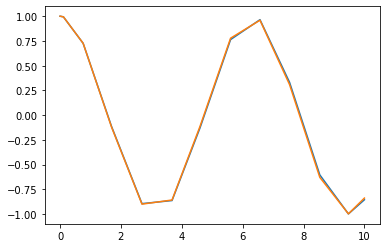

In [78]:
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,solexp(sol.t))

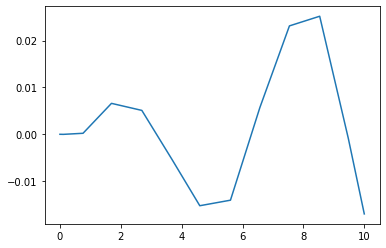

In [79]:
plt.plot(sol.t,sol.y[1]-solexp(sol.t))